In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Crop_recommendation.csv")

In [5]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [6]:
df.shape

(2200, 8)

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

## Distribution of Soil Nutrients (N, P, K)

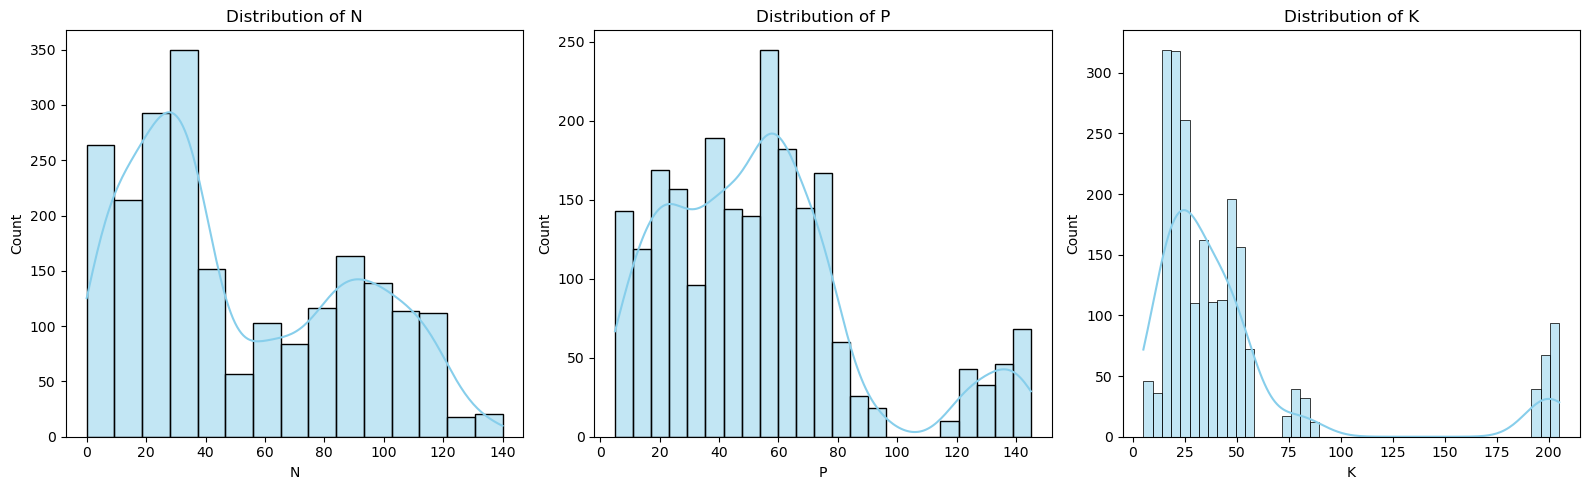

In [13]:
plt.figure(figsize=(16, 5))
for i, col in enumerate(['N', 'P', 'K']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Boxplot of Soil Nutrients by Crop Type

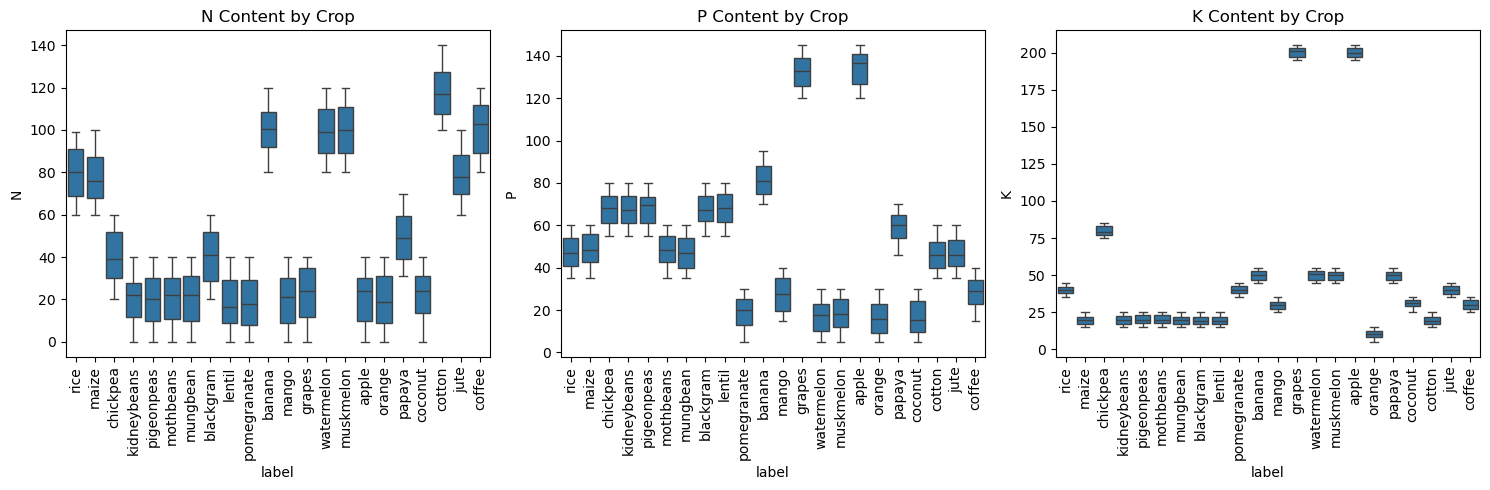

In [14]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['N', 'P', 'K']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='label', y=col)
    plt.xticks(rotation=90)
    plt.title(f'{col} Content by Crop')
plt.tight_layout()
plt.show()

## Scatterplot Matrix (Pairplot)

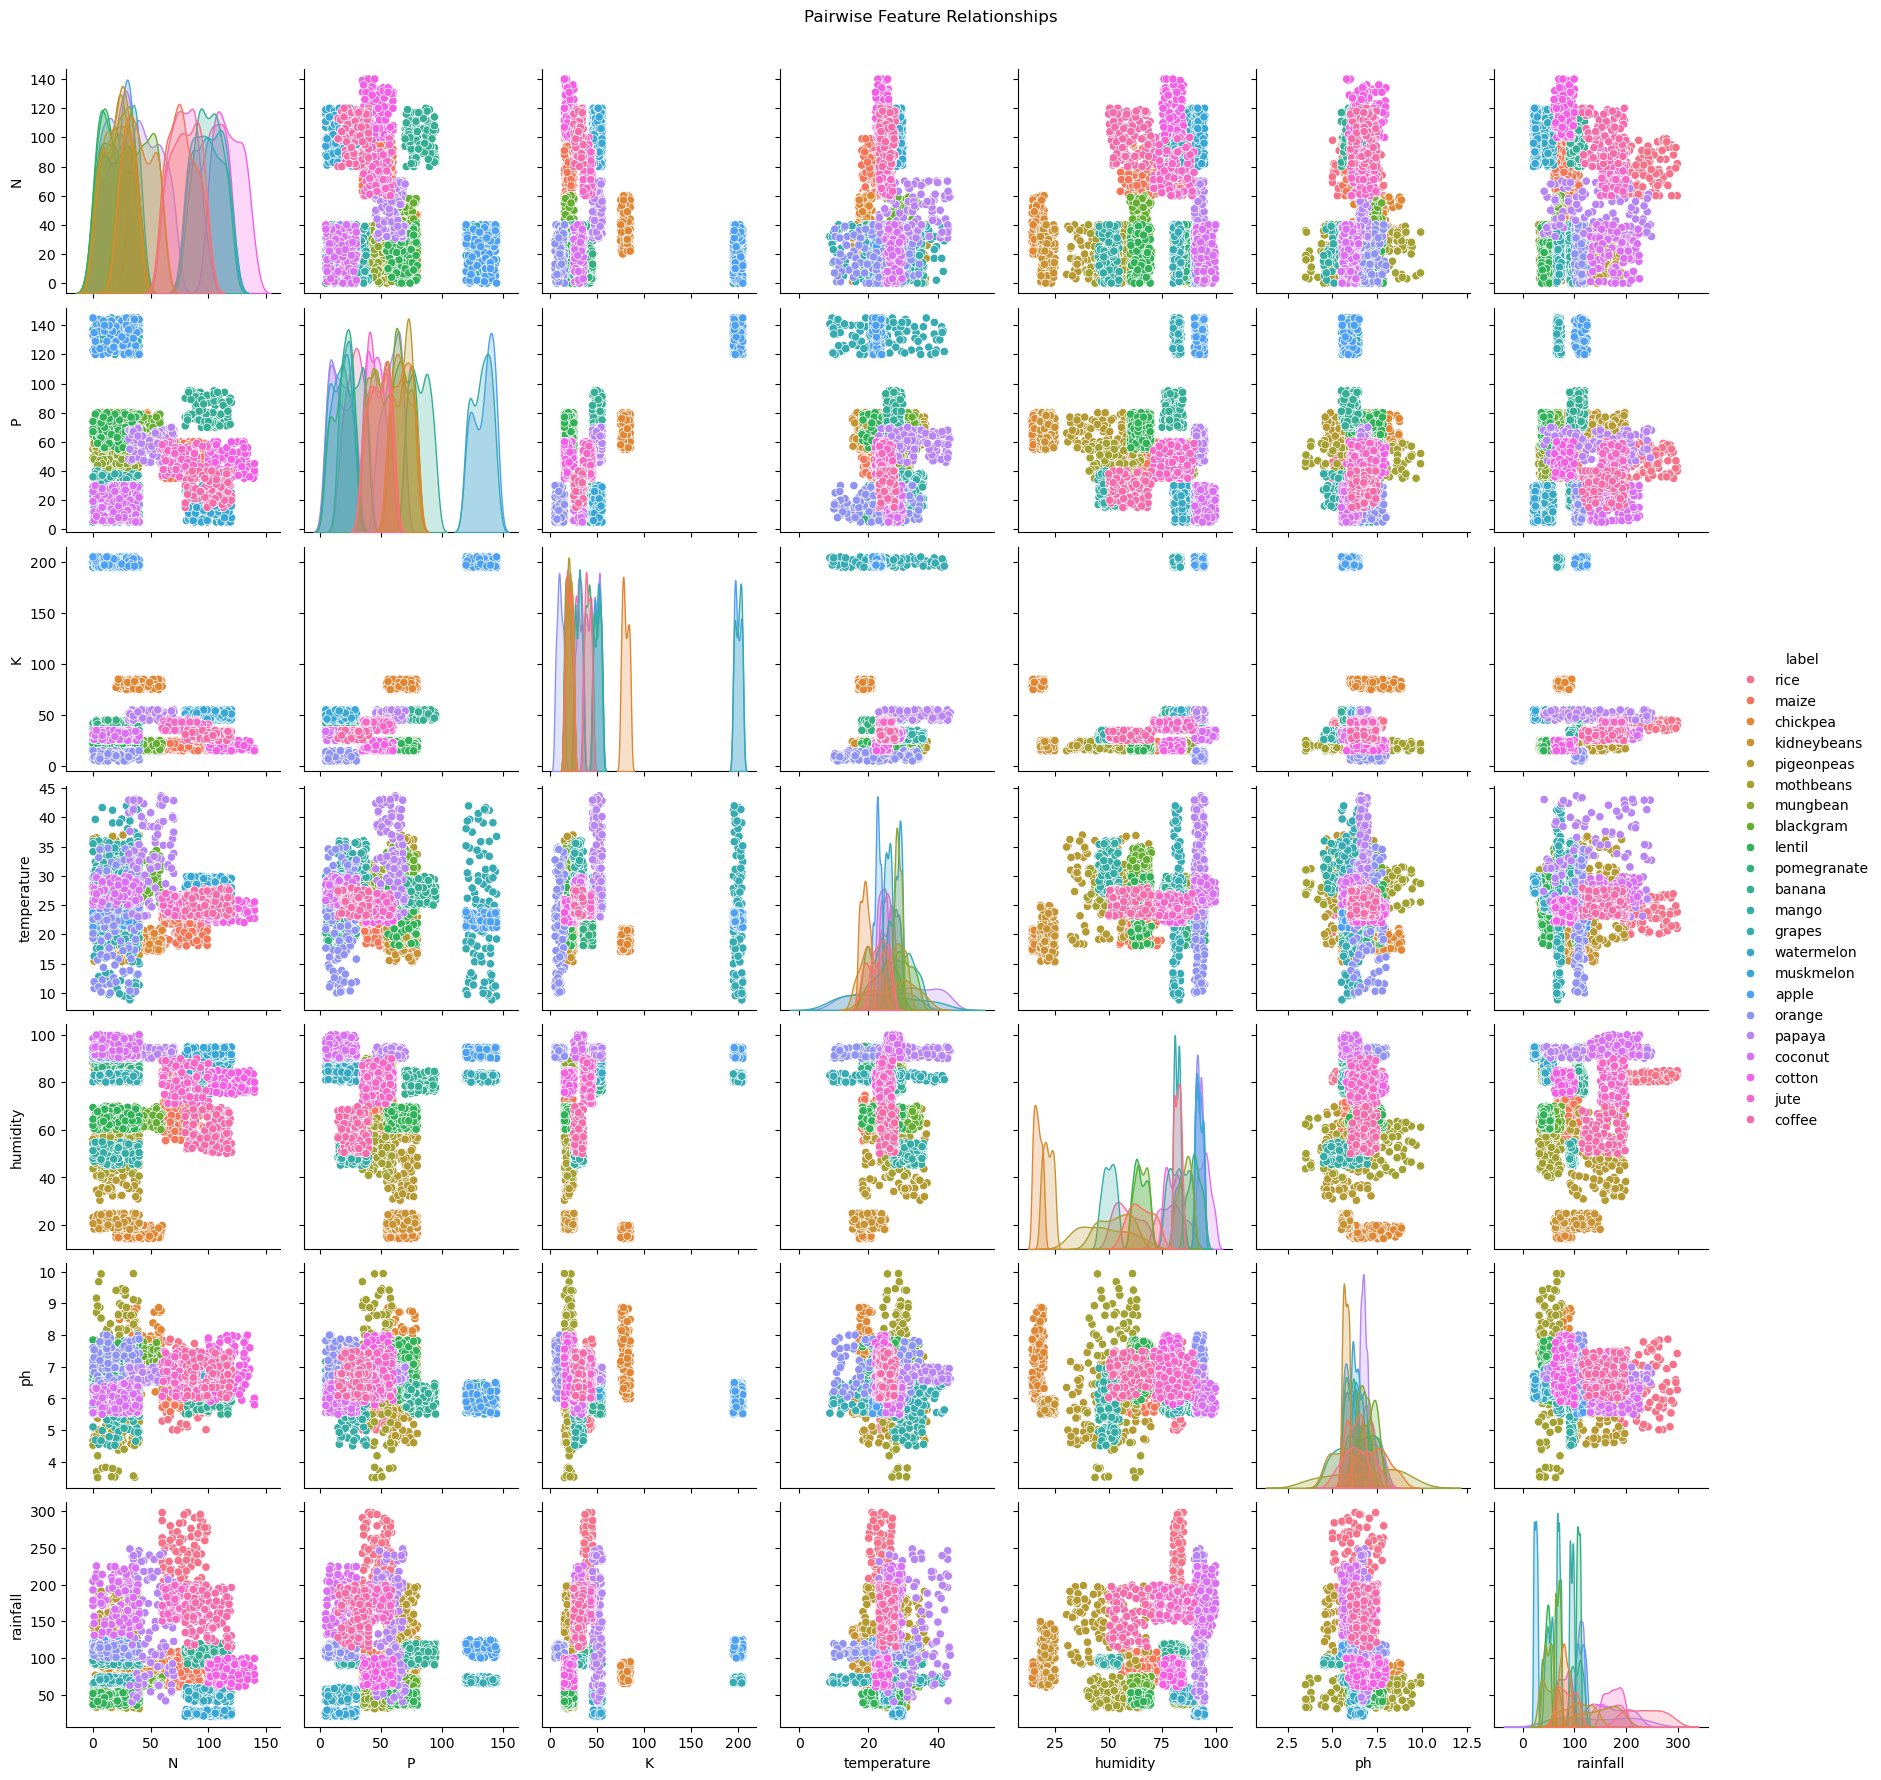

In [19]:
sns.pairplot(df, hue='label', diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

## Heatmap of Feature Correlations

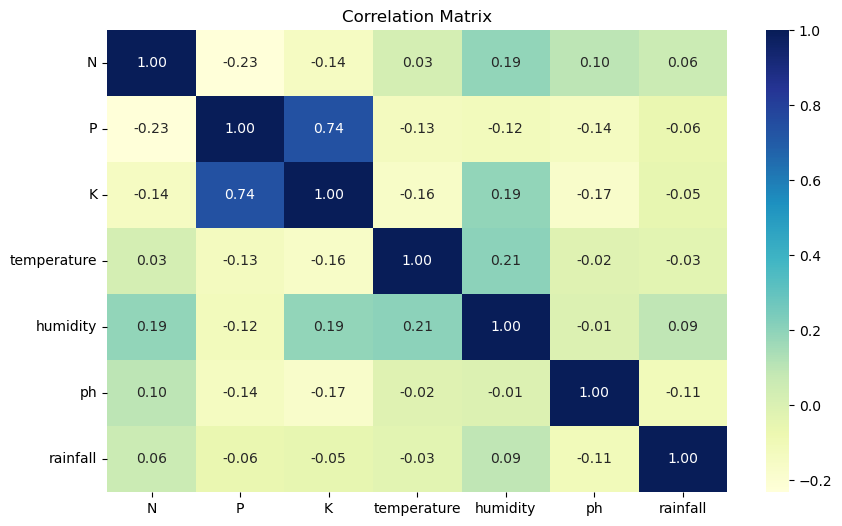

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Countplot of Crop Labels

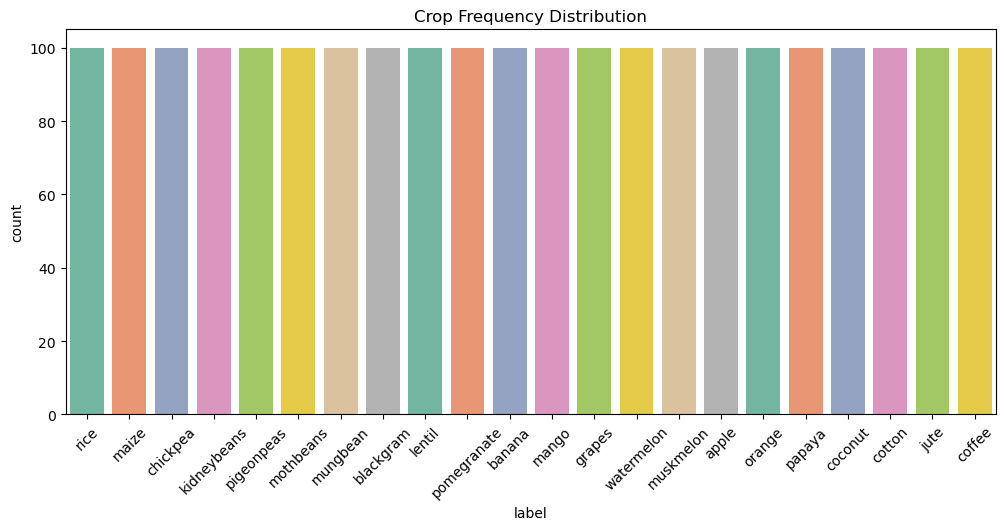

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='label', palette='Set2')
plt.xticks(rotation=45)
plt.title('Crop Frequency Distribution')
plt.show()

## 3D Scatter Plot (N, P, K) colored by Crop Type (Using Plotly)

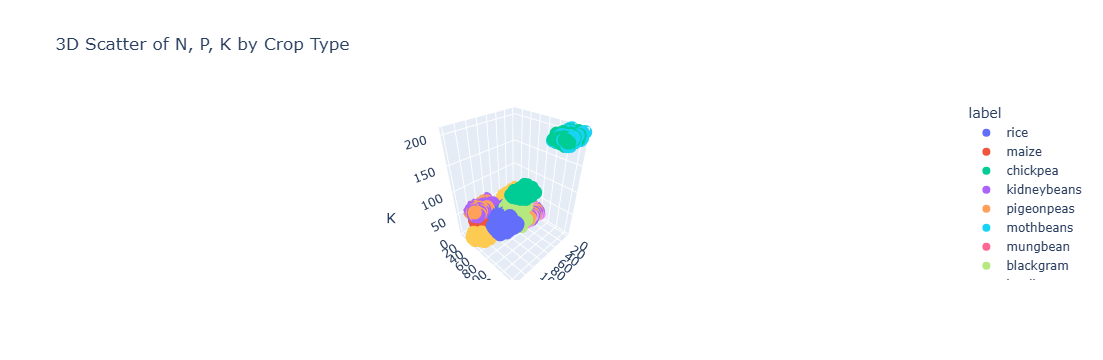

In [23]:
import plotly.express as px

fig = px.scatter_3d(df, x='N', y='P', z='K', color='label',
                    title='3D Scatter of N, P, K by Crop Type')
fig.show()

## Radar Plot (Spider Chart) of Mean Features by Crop

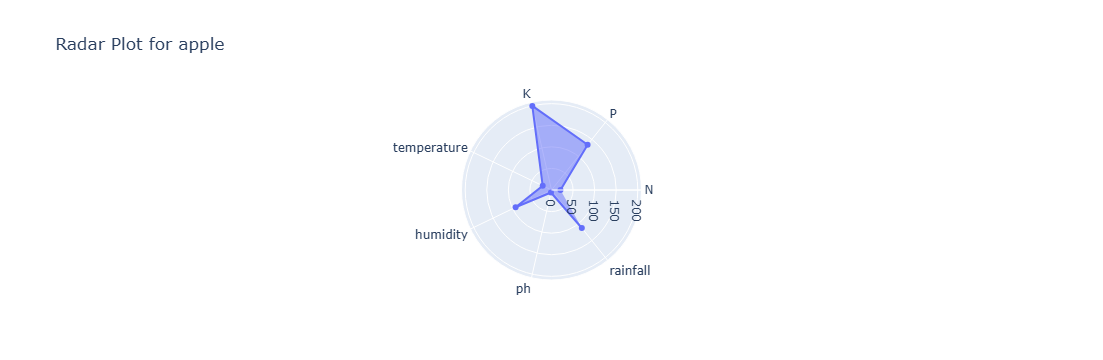

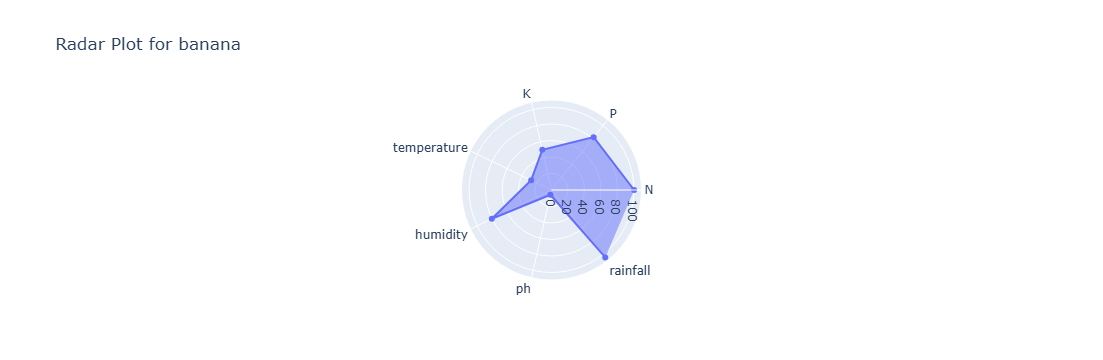

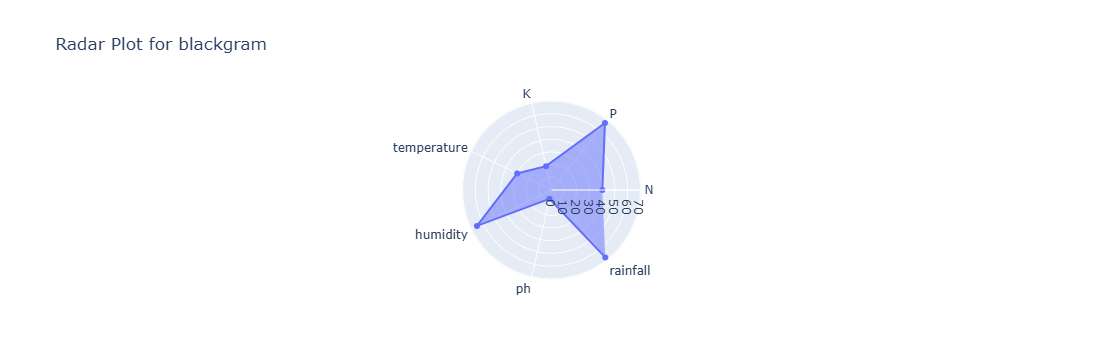

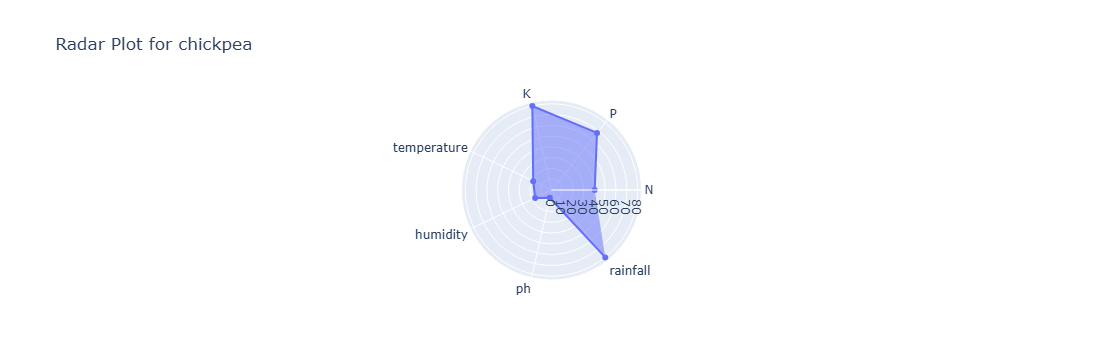

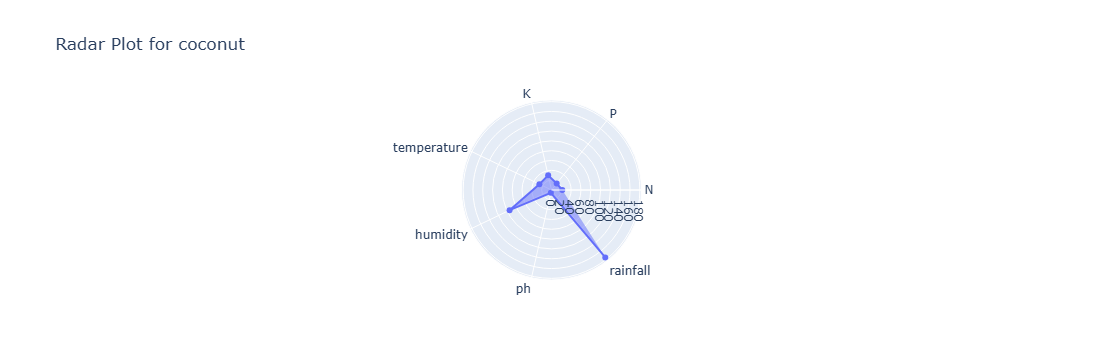

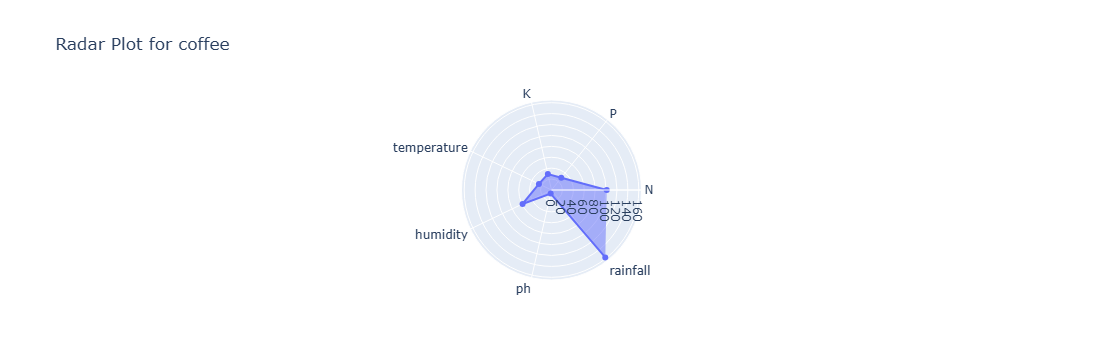

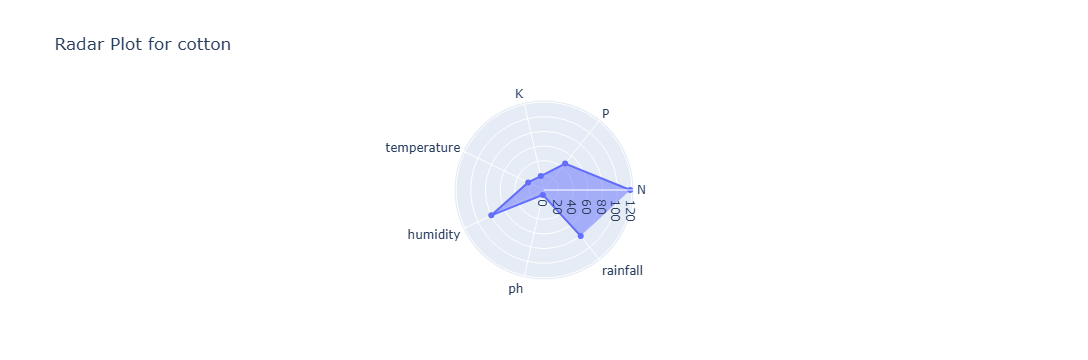

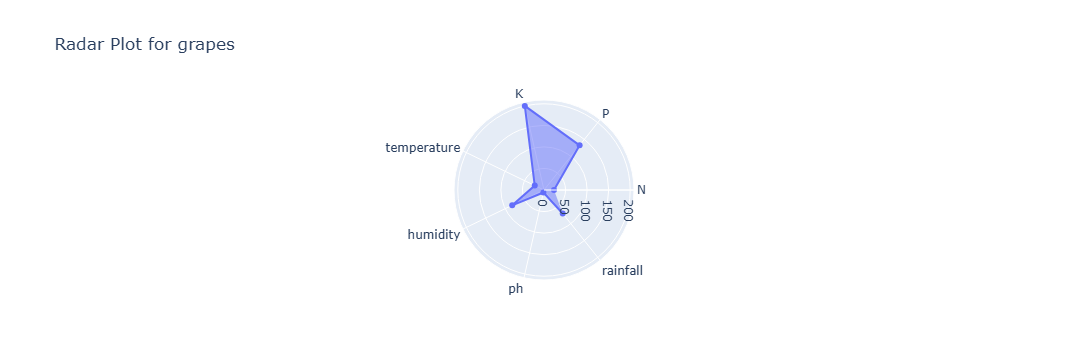

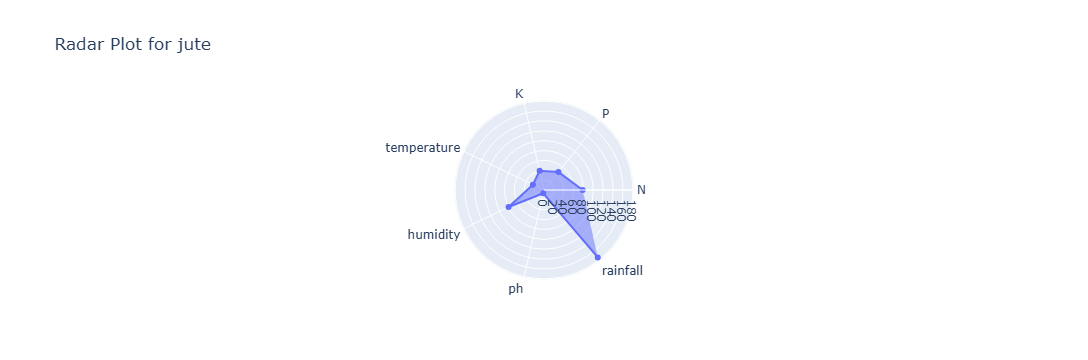

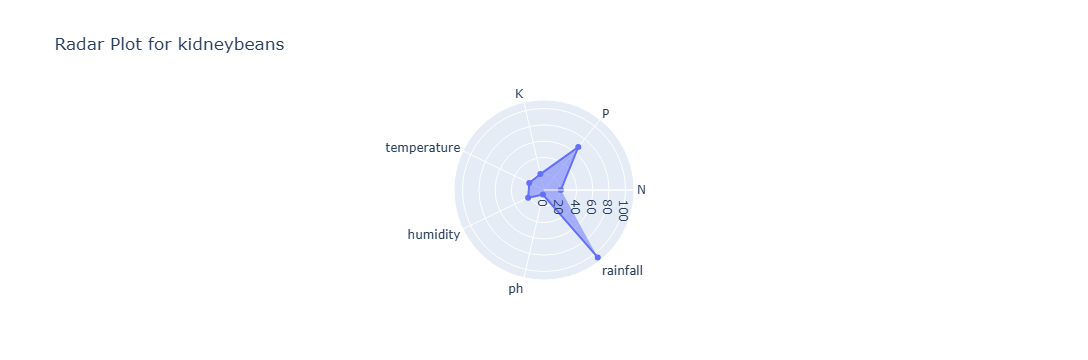

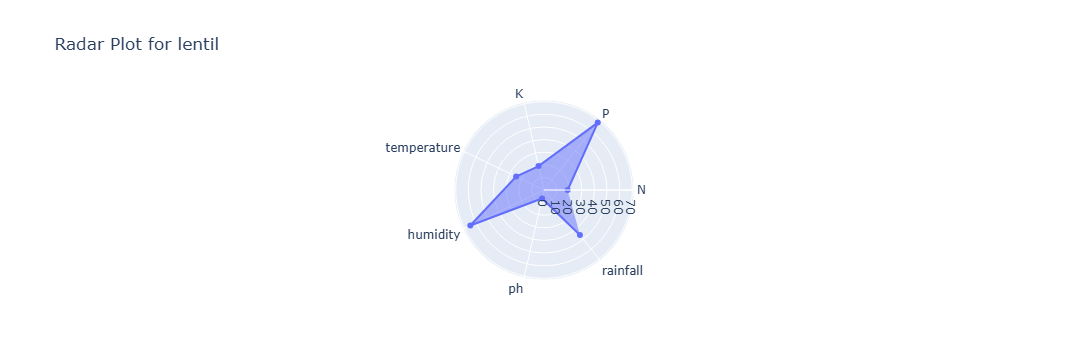

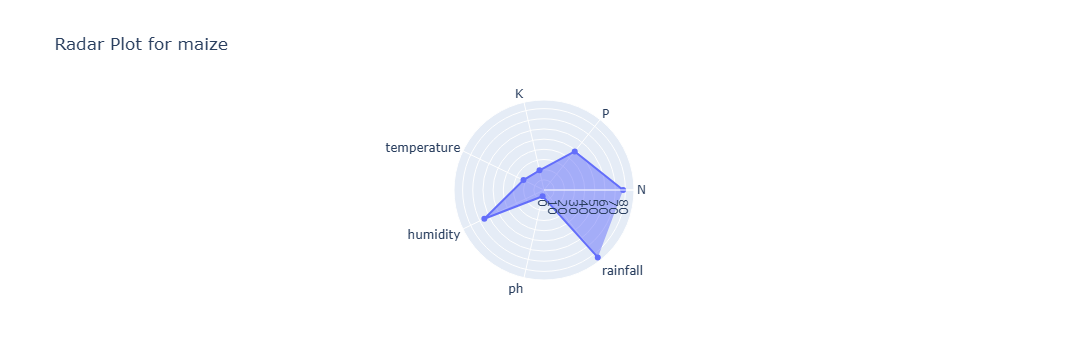

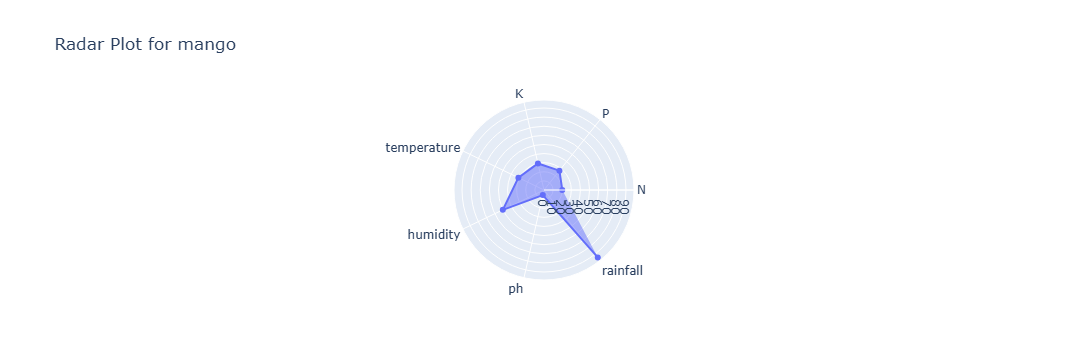

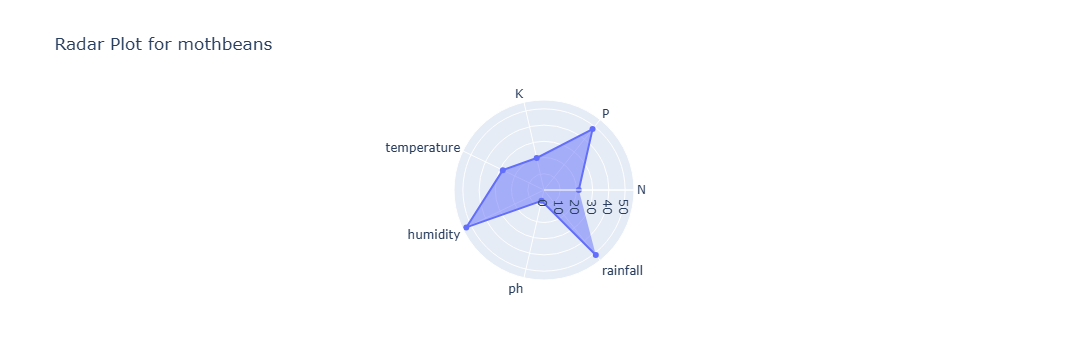

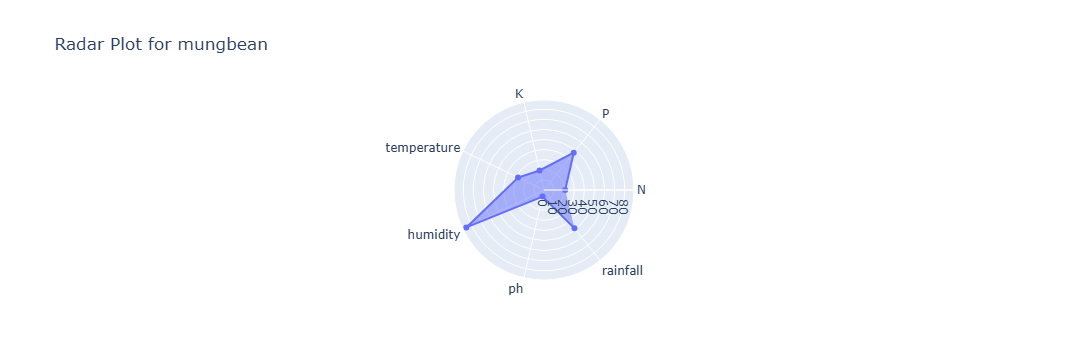

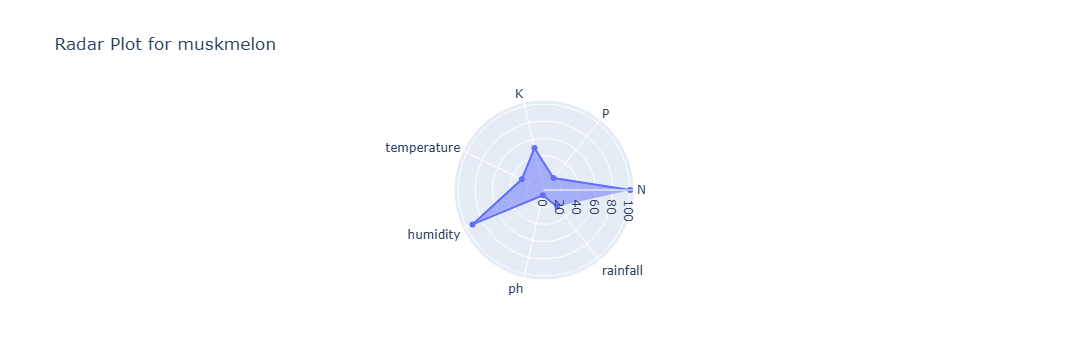

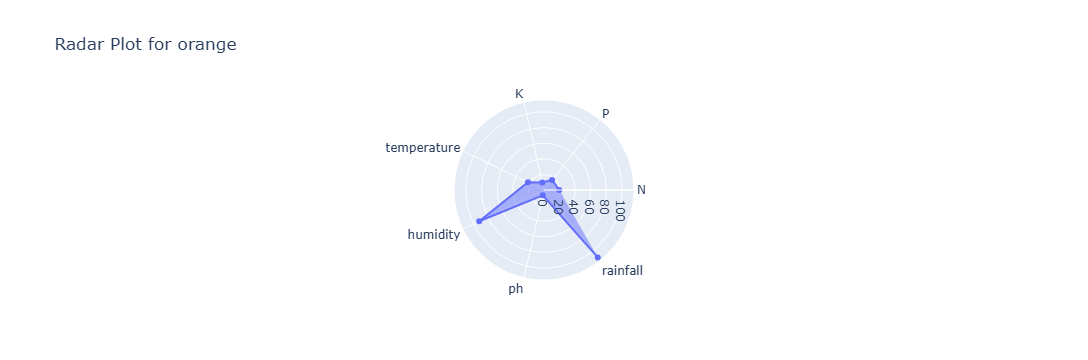

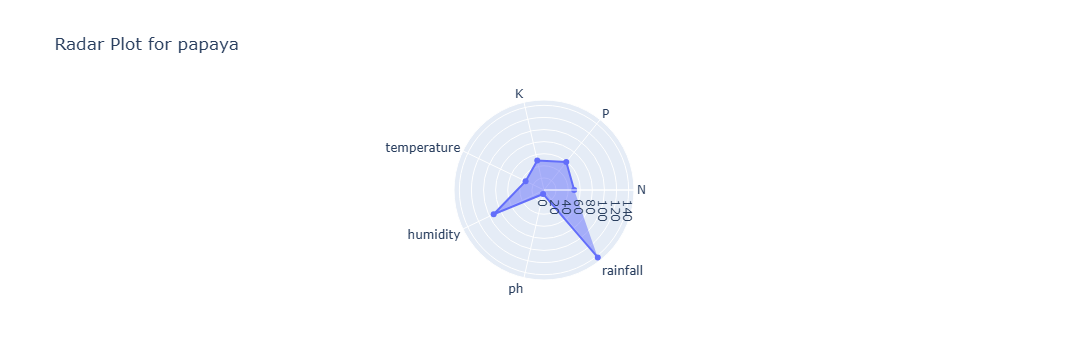

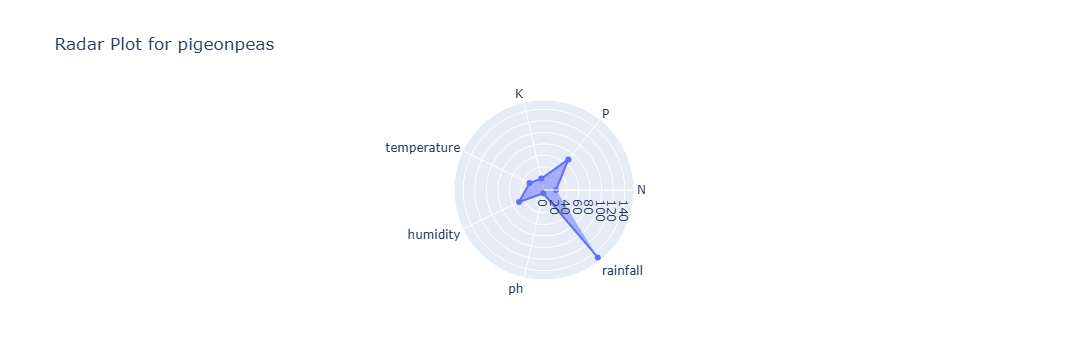

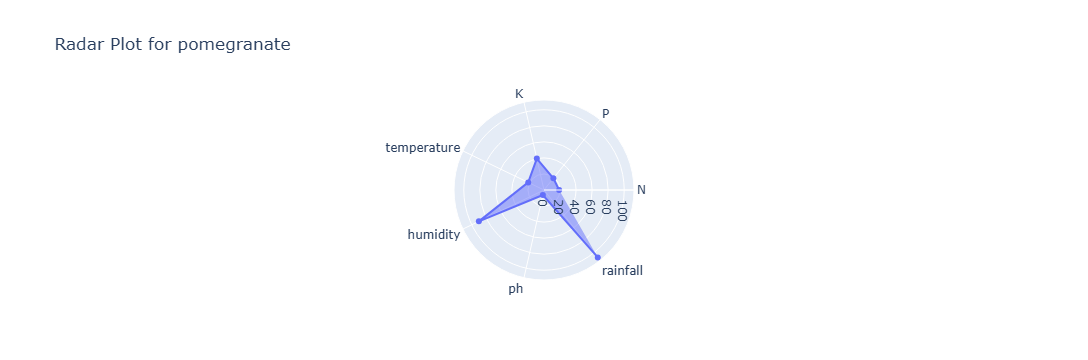

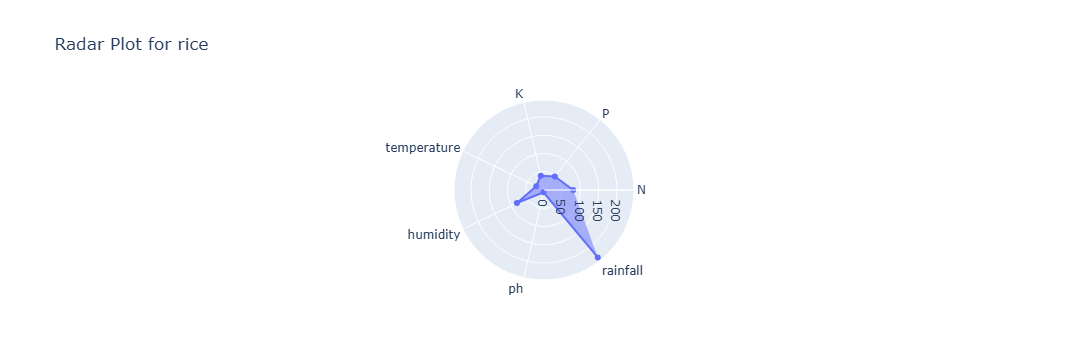

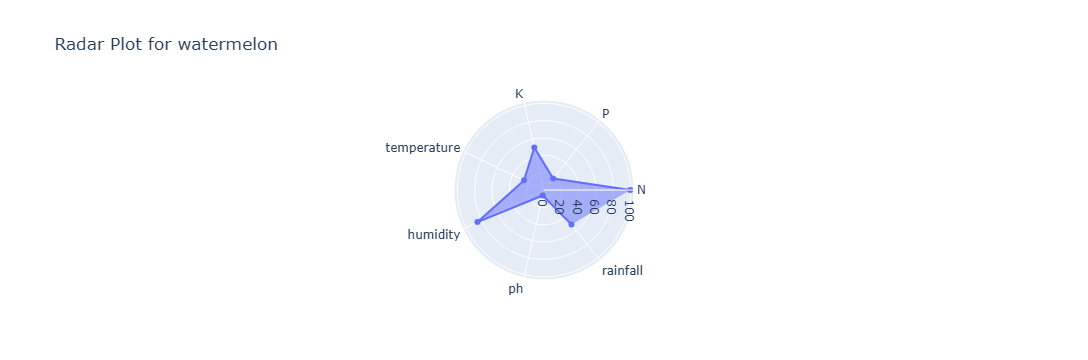

In [25]:
import pandas as pd
import numpy as np

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_mean = df.groupby('label')[features].mean()

import plotly.graph_objects as go

for crop in crop_mean.index:
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=crop_mean.loc[crop].values,
        theta=features,
        fill='toself',
        name=crop
    ))
    fig.update_layout(title=f'Radar Plot for {crop}', polar=dict(radialaxis=dict(visible=True)))
    fig.show()